In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
%matplotlib inline

## SKLearn

(почти) каждый класс в SKLearn имеет следующие методы:

In [ ]:
class KNN():
    def __init__(self, n_neighbors=5, p=2, metric='minkowski'):
        <your code>
    
    def fit(self, X_train, y_train):
        <your code>
        
    def predict(self, X_test):
        <your code>
        
    def predict_proba(self, X_test):
        <your code>

(у регрессий нет predict_proba, есть только predict)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

my_knn = KNN(k=<choose your favourite>)
sklearn_knn = KNeighborsClassifier(k=<choose your favourite>)

## Diabetes

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

In [ ]:
diabetes.DESCR.split('\n')

In [4]:
X_df = pd.DataFrame(diabetes_X, columns=diabetes.feature_names)
X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Посмотрим на корреляции признаков между собой:

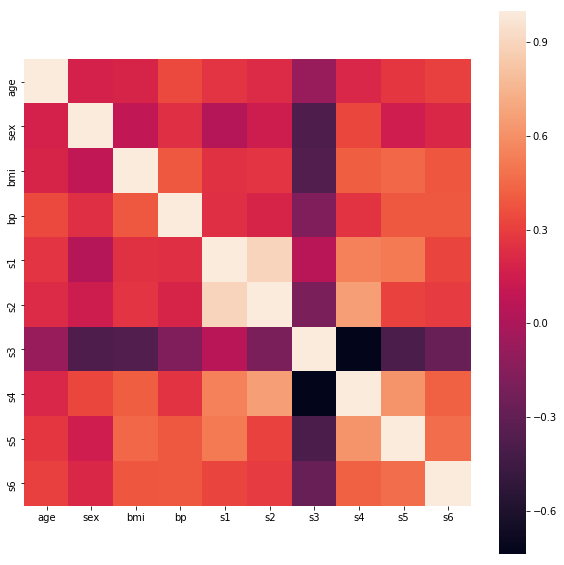

In [5]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(X_df.corr(), square=True)
plt.show()

### Linear Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [8]:
lr = LinearRegression()
np.mean(cross_val_score(lr, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-2993.0729432998864

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.2)

In [11]:
lr = LinearRegression().fit(x_train, y_train)
lr.predict(x_test).ravel().astype(int)

array([105, 105, 161, 164, 139, 202, 290, 119, 138, 194, 148, 193,  90,
       159,  84, 149,  68, 189, 146,  69, 167,  72, 193,  95, 118, 179,
       138,  67, 156, 262, 204,  92, 158, 198, 138, 189, 236, 209,  79,
       171, 260, 101, 183, 117, 107,  97, 274, 151,  76, 117, 168, 165,
       173, 260, 112, 178, 252, 199, 158,  89, 108, 108, 105, 122,  93,
       119, 125, 215,  40, 171, 157, 130, 143, 160, 124, 186,  88, 258,
       247, 258, 193, 128, 230, 206, 197,  52, 122, 100,  85])

In [12]:
np.array(y_test).ravel()

array([ 84.,  94., 252., 151., 103., 248., 270., 253.,  59., 292., 172.,
       272.,  91., 154.,  71.,  95.,  77., 229., 182.,  39., 225.,  75.,
       283., 102.,  61., 144., 146.,  57.,  73., 242., 151.,  64., 141.,
       222.,  83., 178., 321., 288.,  51., 121., 263., 104.,  91.,  96.,
       108., 158., 346., 200.,  55., 179., 141., 109., 181., 303.,  72.,
       107., 281., 173., 134.,  96., 199., 102.,  65.,  97., 113.,  63.,
       111., 121.,  45., 128., 259., 191., 142., 120.,  60., 129.,  88.,
       310., 245., 233., 175., 135.,  99., 109., 191.,  72.,  51.,  87.,
        96.])

Посмотрим, какие коэффициенты получились у линейной регрессии:

In [13]:
print(X_df.columns)
print(lr.coef_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[ -24.01068423 -248.47415492  551.47701908  311.76680215 -896.37336672
  556.33274728  228.01583667  236.63374957  772.75884392   70.42447924]


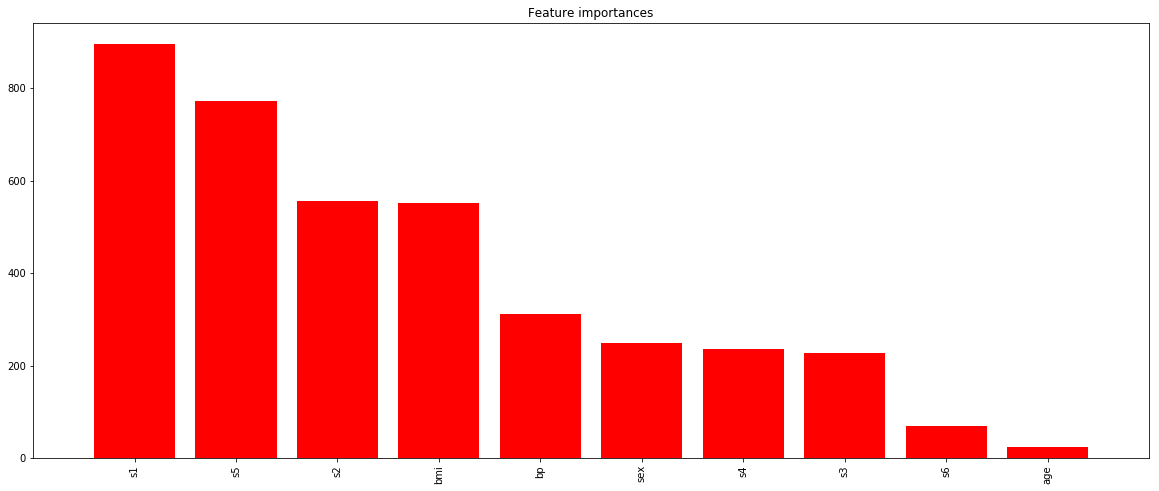

In [14]:
importances = np.abs(lr.coef_)
indices = np.argsort(importances)[::-1]
columns_num = len(X_df.columns)

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(columns_num), importances[indices],
       color="r",  align="center")
plt.xticks(range(columns_num), X_df.columns[indices])
plt.xlim([-1, columns_num])
plt.xticks(rotation=90)
plt.show()

# To-Do

In [ ]:
<Попробуйте применить Lasso и Ridge регрессии к нашему набору данных>

Посмотрим также на корреляцию признаков:

In [16]:
from sklearn.linear_model import Lasso

In [17]:
llr = Lasso(alpha=0.1)
np.mean(cross_val_score(llr, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-3008.892221996572

In [19]:
llr = Lasso(alpha=0.1).fit(x_train, y_train)

In [22]:
X_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [42]:
res = pd.DataFrame(data = [llr.coef_], columns = X_df.columns.values)
res.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.0,-160.412976,546.111156,255.811272,-22.170639,-0.0,-163.651309,0.0,463.498356,39.801009


In [32]:
from sklearn.linear_model import Ridge

In [33]:
rlr = Ridge(alpha=0.1)
np.mean(cross_val_score(rlr, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-3006.6971771020735

In [34]:
rlr = Ridge(alpha=0.1).fit(x_train, y_train)

In [44]:
res = pd.DataFrame(data = [rlr.coef_], columns = X_df.columns.values)
res.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-11.261272,-205.559231,502.522771,284.104843,-62.368414,-63.550917,-142.079196,126.483033,420.330625,94.769207


## Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

In [45]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [46]:
X_train, Y_train = np.array(train_data.drop("cardio", axis=1).drop("id", axis=1)), np.array(train_data['cardio'])

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
np.mean(cross_val_score(rf, X_train, Y_train, scoring='accuracy', cv=5))

C:\Workspace\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7000142830612245

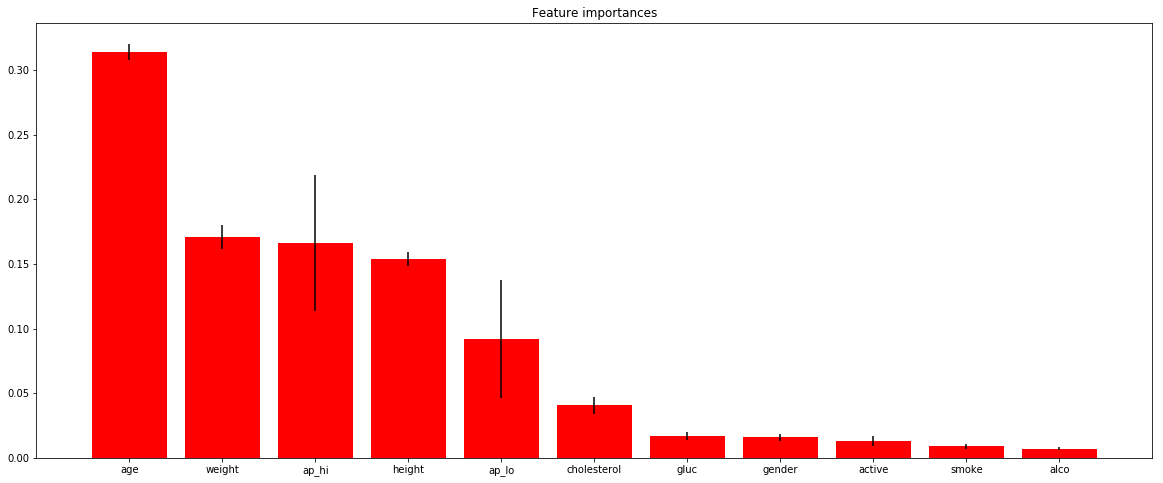

In [48]:
rf = RandomForestClassifier().fit(X_train, Y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), train_data.drop(["cardio", "id"], axis=1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [53]:
from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(max_depth=3)
params = {
    'n_estimators': [10, 20],
    'max_depth': [3, 10, 50, None],
    'min_samples_split': [2, 3, 4]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=3, verbose=2)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=3, min_samples_split=2, n_estimators=10 ...............
[CV] ...... max_depth=3, min_samples_split=2, n_estimators=10 -   0.2s
[CV] max_depth=3, min_samples_split=2, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... max_depth=3, min_samples_split=2, n_estimators=10 -   0.2s
[CV] max_depth=3, min_samples_split=2, n_estimators=10 ...............
[CV] ...... max_depth=3, min_samples_split=2, n_estimators=10 -   0.2s
[CV] max_depth=3, min_samples_split=2, n_estimators=20 ...............
[CV] ...... max_depth=3, min_samples_split=2, n_estimators=20 -   0.5s
[CV] max_depth=3, min_samples_split=2, n_estimators=20 ...............
[CV] ...... max_depth=3, min_samples_split=2, n_estimators=20 -   0.4s
[CV] max_depth=3, min_samples_split=2, n_estimators=20 ...............
[CV] ...... max_depth=3, min_samples_split=2, n_estimators=20 -   0.5s
[CV] max_depth=3, min_samples_split=3, n_estimators=10 ...............
[CV] ...... max_depth=3, min_samples_split=3, n_estimators=10 -   0.2s
[CV] max_depth=3, min_samples_split=3, n_estimators=10 ...............
[CV] ...... max_depth=3, min_samples_split=3, n_estimators=10 -   0.2s
[CV] max_depth=3, min_samples_split=3, n_estimators=10 ...............
[CV] .

[CV] ... max_depth=None, min_samples_split=2, n_estimators=20 -   1.9s
[CV] max_depth=None, min_samples_split=3, n_estimators=10 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=10 -   0.9s
[CV] max_depth=None, min_samples_split=3, n_estimators=10 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=10 -   0.9s
[CV] max_depth=None, min_samples_split=3, n_estimators=10 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=10 -   0.9s
[CV] max_depth=None, min_samples_split=3, n_estimators=20 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=20 -   1.9s
[CV] max_depth=None, min_samples_split=3, n_estimators=20 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=20 -   1.8s
[CV] max_depth=None, min_samples_split=3, n_estimators=20 ............
[CV] ... max_depth=None, min_samples_split=3, n_estimators=20 -   1.8s
[CV] max_depth=None, min_samples_split=4, n_estimators=10 ............
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20], 'max_depth': [3, 10, 50, None], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [50]:
print(gsv.best_params_, gsv.best_score_)

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 20} 0.7355714285714285


In [51]:
gsv.grid_scores_

[mean: 0.71851, std: 0.00243, params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10},
 mean: 0.72323, std: 0.00490, params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20},
 mean: 0.72274, std: 0.00607, params: {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 10},
 mean: 0.72227, std: 0.00187, params: {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 20},
 mean: 0.72564, std: 0.00381, params: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10},
 mean: 0.72397, std: 0.00094, params: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 20},
 mean: 0.73267, std: 0.00010, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10},
 mean: 0.73469, std: 0.00081, params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20},
 mean: 0.73356, std: 0.00089, params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 10},
 mean: 0.73557, std: 0.00031, params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 2

#### XGBoost

In [ ]:
<do the same for GradientBoostingClassifier and other eatimators> 

### Model Ensembles

Мы можем предсказывать не класс, а вероятности классов:

In [54]:
train_data = pd.read_csv("train_med.csv", delimiter=';')

X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=37)

In [56]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)
pred = rf.predict_proba(X_test)

In [57]:
pred

array([[0.1, 0.9],
       [0.1, 0.9],
       [0.6, 0.4],
       ...,
       [0.3, 0.7],
       [0.5, 0.5],
       [0.4, 0.6]])

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

estimator1 = SVC()
estimator2 = DecisionTreeClassifier()

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)

pred1 = estimator1.predict_proba(X_test)[:, 1]
pred2 = estimator2.predict_proba(X_test)[:, 1]

#pred = <compute average of all the estimators>